In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [3]:
plt.rc('font', family='NanumGothicBold') 

데이터 불러오기

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=pd.concat([train, test], axis=0)

In [5]:
data=data.reset_index(drop=True)

In [6]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


출근자 수 칼럼 추가

In [7]:
data['출근자수']=data['본사정원수']-data['본사출장자수']-data['본사휴가자수']-data['현본사소속재택근무자수']

In [8]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


요일 평균 식계: 중식계와 석식계 요일별 시각화

<AxesSubplot:xlabel='요일', ylabel='석식계'>

findfont: Font family ['NanumGothicBold'] not found. Falling back to DejaVu Sans.


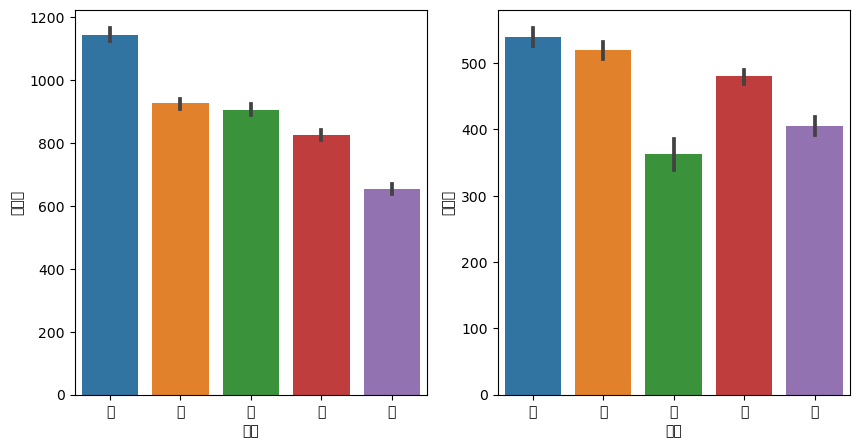

In [9]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='요일', y='중식계', data=data, ax=ax[0])
sns.barplot(x='요일', y='석식계', data=data, ax=ax[1])

공휴일 유무가 식수에 영향을 미칠 것이라고 예상하여 공휴일 전 날 칼럼 생성

In [10]:
data['공휴일전날']=0

data['공휴일전날'][4]=1 #'16 설연휴
data['공휴일전날'][17]=1 #삼일절
data['공휴일전날'][47]=1 #국회의원 선거
data['공휴일전날'][62]=1 #어린이날
data['공휴일전날'][67]=1 #석가탄신일
data['공휴일전날'][152]=1 #추석연휴
data['공휴일전날'][245]=1 #'17 설연휴
data['공휴일전날'][264]=1 #'17 삼일절
data['공휴일전날'][309]=1 # 석가탄신일
data['공휴일전날'][310]=1 #'17 어린이날
data['공휴일전날'][330]=1 #'17 현충일
data['공휴일전날'][379]=1 #'17 광복절
data['공휴일전날'][502]=1 #'18 설연휴
data['공휴일전날'][510]=1 #'18 삼일절
data['공휴일전날'][552]=1 #'18 근로자의 날
data['공휴일전날'][555]=1 #'18 어린이날
data['공휴일전날'][565]=1 #'18 석가탄신일
data['공휴일전날'][575]=1 #'18 현충일
data['공휴일전날'][579]=1 #'18 지방선거
data['공휴일전날'][623]=1 #'18 광복절
data['공휴일전날'][650]=1 #'18 추석연휴
data['공휴일전날'][651]=1 #'18 한글날
data['공휴일전날'][705]=1 #'18 성탄절
data['공휴일전날'][709]=1 #'19 신정
data['공휴일전날'][732]=1 #'19 설연휴
data['공휴일전날'][748]=1 #'19 삼일절
data['공휴일전날'][790]=1 #'19 근로자의 날
data['공휴일전날'][814]=1 #'19 현충일
data['공휴일전날'][863]=1 #'19 광복절
data['공휴일전날'][882]=1 #'19 추석연휴
data['공휴일전날'][894]=1 #'19 개천절
data['공휴일전날'][897]=1 #'19 한글날
data['공휴일전날'][951]=1 #'19 성탄절
data['공휴일전날'][955]=1 #'20 신정
data['공휴일전날'][971]=1 #'20 설연휴
data['공휴일전날'][995]=1 #'20 삼일절
data['공휴일전날'][1027]=1 #'20 국회의원선거
data['공휴일전날'][1037]=1 #'20 석가탄신일
data['공휴일전날'][1038]=1 #'20 어린이날
data['공휴일전날'][1061]=1 #'20 현충일
data['공휴일전날'][1099]=1 #'20 광복절
data['공휴일전날'][1129]=1 #'20 추석연휴
data['공휴일전날'][1133]=1 #'20 한글날
data['공휴일전날'][1187]=1 #'20 성탄절

data['공휴일전날'][1215]=1 #'21 설연휴
data['공휴일전날'][1225]=1 #'21 삼일절

EDA: 요일별 출근자 수와 중식계 scatterplot

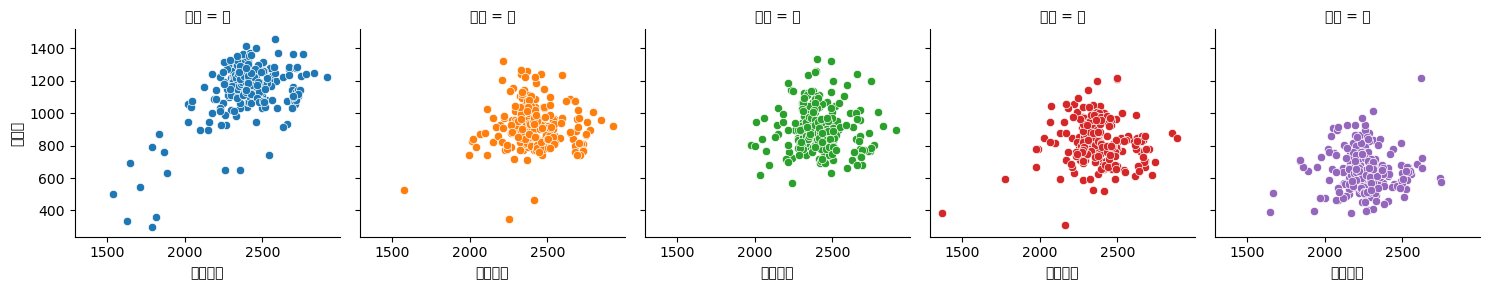

In [11]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '출근자수', '중식계')

요일별 야근자수와 석식계의 scatterplot 

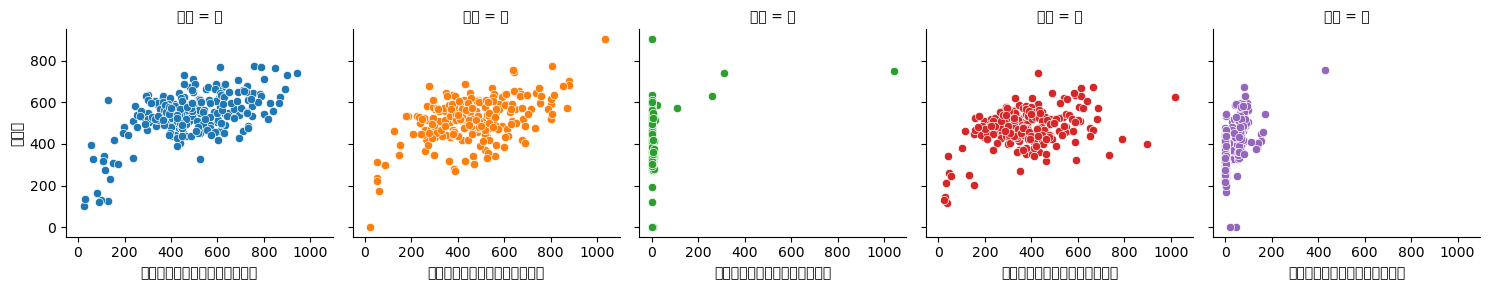

In [12]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')

요일별 중식계와 석식계의 scatterplot

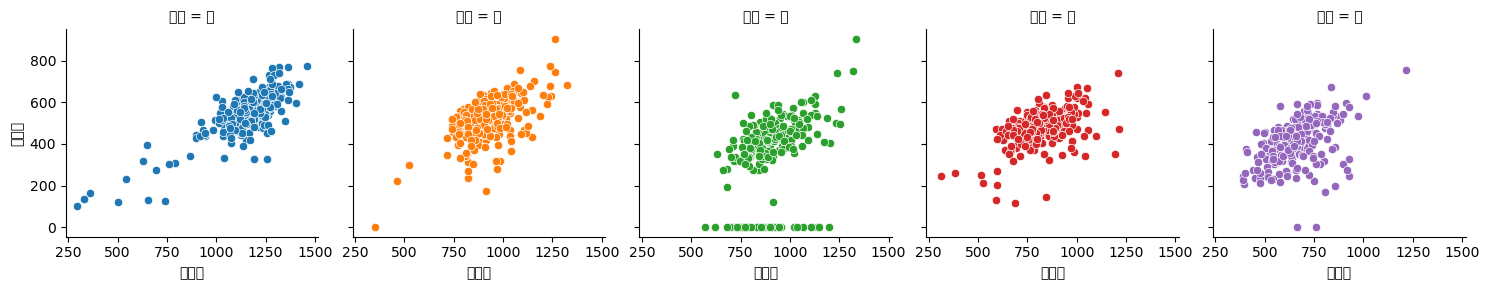

In [13]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '중식계', '석식계')

공휴일 전날과 중식계의 scatterplot

중식계 시각화

<AxesSubplot:>

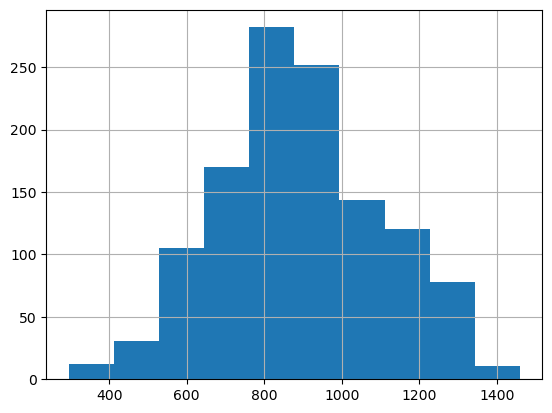

In [14]:
data['중식계'].hist()

석식계 시각화

<AxesSubplot:>

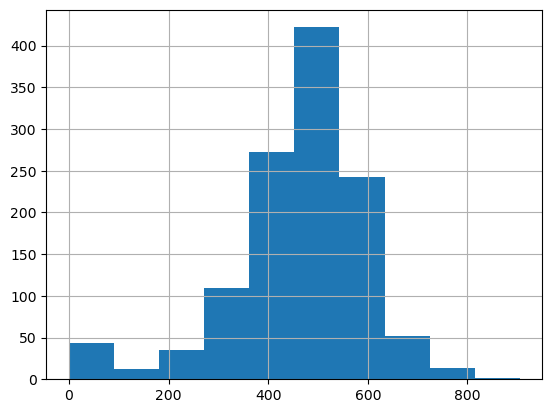

In [15]:
data['석식계'].hist()

공휴일 전날과 석식계 plot

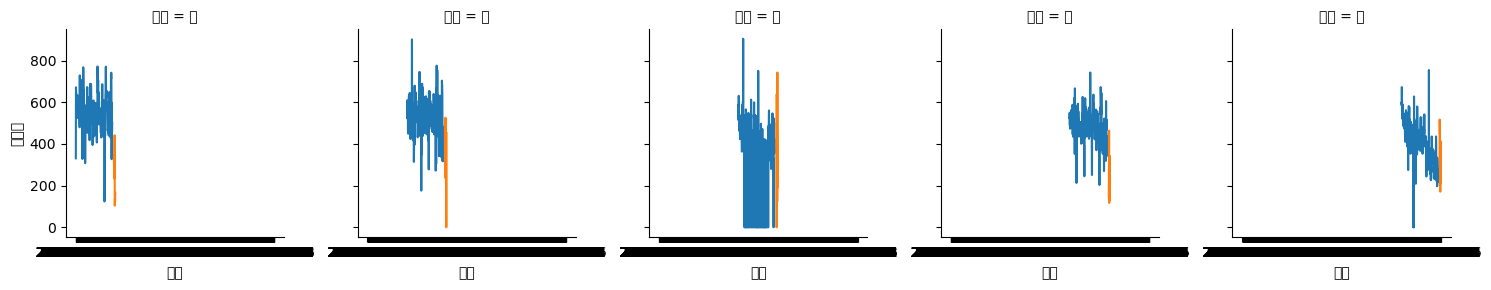

In [23]:
grid = sns.FacetGrid(data=data, col='요일', hue = '공휴일전날')
grid.map(plt.plot, '일자', '석식계')

야근자수와 석식계의 scatterplot, 공휴일 전날 

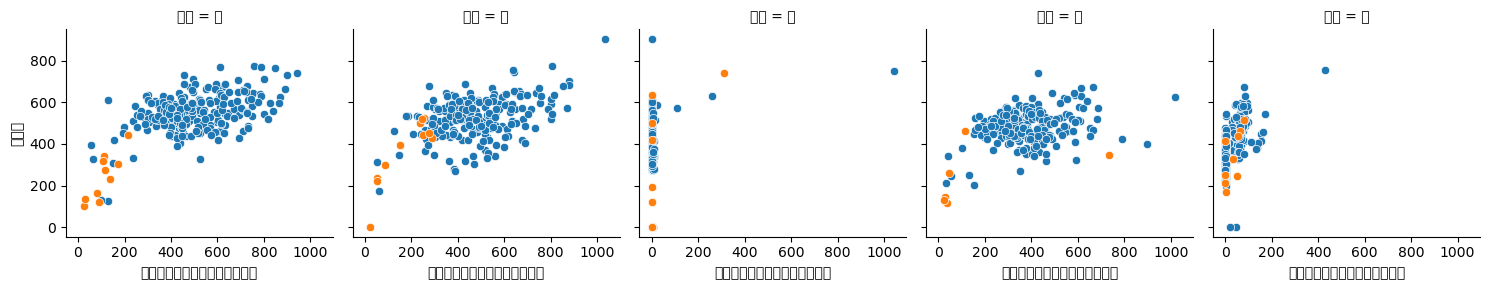

In [24]:
grid = sns.FacetGrid(data=data, col='요일', hue = '공휴일전날')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')

In [25]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수,공휴일전날
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,1


공휴일 전날은 1, 공휴일 전날이 아닌 경우 0

<AxesSubplot:xlabel='공휴일전날', ylabel='중식계'>

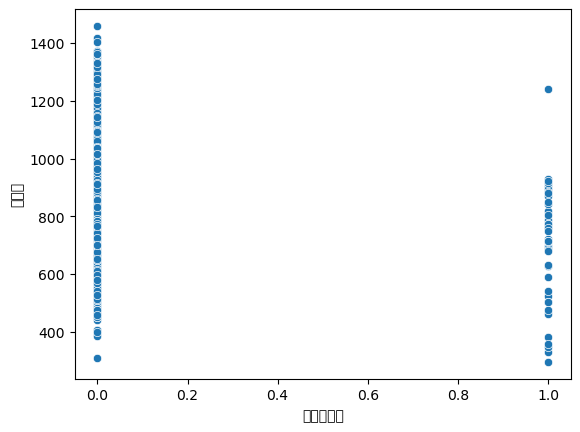

In [26]:
sns.scatterplot(data=data, x='공휴일전날', y='중식계')

공휴일 전날과 공휴일 전날이 아닌 경우를 나누어 data 처리

In [27]:
data_not_holiday=data[data['공휴일전날']==0]
data_holiday=data[data['공휴일전날']==1]

In [28]:
data_not_holiday.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수,공휴일전날
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,2075.0,0


In [29]:
data_holiday.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수,공휴일전날
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,1
17,2016-02-29,월,2601,595,168,110,0.0,모닝롤/프렌치토스트 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 콩나물...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 얼갈이된장국 제육볶음 늙은호박전 치커리생채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 버섯들깨탕 꽁치한마리구이 두부양념조림 구이...",869.0,344.0,1838.0,1
47,2016-04-12,화,2643,76,225,239,0.0,"모닝롤/씨크립샌드 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쇠고기:호주산,쌀:...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 부대찌개 쇠고기단호박조림 (쇠고기:호주산) 열...","치킨마요덮밥 (닭,쌀:국내산) 유부주머니국 떡볶이 단무지무침 오렌지 포기김치...",771.0,500.0,2342.0,1
62,2016-05-04,수,2635,150,244,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 밤죽/쌀밥 (쌀:국내산) 콩나물김치국 브로컬...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 오징어볶음 동태전 무생채 포기김치 (...,카레덮밥 미소장국 수제미니햄버거 오이소박이 사과/오렌지쥬스 포기김치 (김치...,723.0,636.0,2241.0,1
67,2016-05-13,금,2635,185,268,80,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 아욱국 노...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 매운돼지갈비찜 해물파전 치커리유자생채 배...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 코다리강정 잡채 얼갈이나물 포기김치 (...,761.0,517.0,2182.0,1


ANOVA 분석

In [30]:
data_holiday['중식계'].mean()

708.8409090909091

In [31]:
data_not_holiday['중식계'].mean()

897.2127476313523

In [32]:
data_holiday['석식계'].mean()

308.95454545454544

In [45]:
data_not_holiday['석식계'].mean()

467.5641688199828

공휴일 전날보다 공휴일 전날이 아닌 경우 중식계와 석식계의 값이 더 높게 확인된다

In [47]:
_,p=f_oneway(data_holiday['중식계'], data_not_holiday['중식계'])
print(p)

nan


T-Test

In [36]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

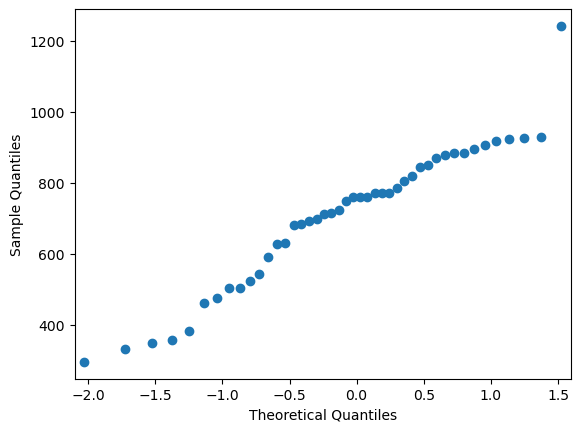

In [37]:
qqplot(data_holiday['중식계'], line='s')
plt.show()

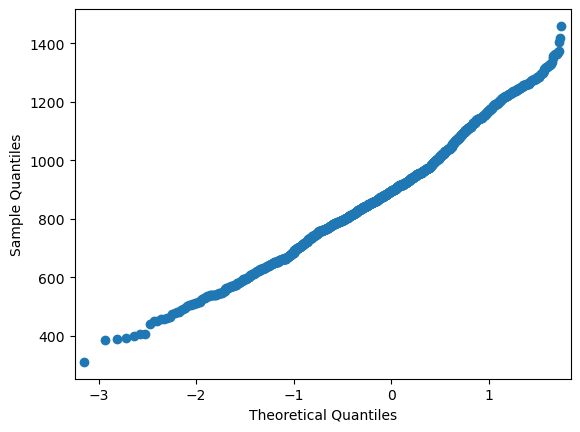

In [41]:
qqplot(data_not_holiday['중식계'], line='s')
plt.show()

In [42]:
#Normality test – Shapiro-Wilk Test

from scipy.stats import shapiro
shapiro(data_holiday['중식계'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [43]:
#Normality test – Shapiro-Wilk Test
from scipy.stats import shapiro
shapiro(data_not_holiday['중식계'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [40]:
#equal variance test

from scipy.stats import bartlett
stat, p=bartlett(data_holiday['중식계'], data_not_holiday['중식계'])
print(stat, p)

0.12740806027982068 0.7211347347423331


In [44]:
#Wilcoxon rank-sum test

#두개의 데이터가 Normality의 조건을 만족하지 않기에 t-test의 경우 Wilcoxon rank-sum test라는 non-parametric method로 대체하여 분석을 실시한다.

print(stats.ranksums(data_holiday['중식계'], data_not_holiday['중식계']))

RanksumsResult(statistic=nan, pvalue=nan)
